In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score

In [3]:
from sklearn.svm import SVC

In [4]:
df=pd.read_excel("knn.xlsx")

In [5]:
df

,Mark 1,mark2,Team
0,10,12,Blue
1,12,13,Green
2,15,10,Green
3,9,8,Blue
4,11,8,Blue
5,6,10,Blue
6,12,16,Green


In [6]:
df.head()

,Mark 1,mark2,Team
0,10,12,Blue
1,12,13,Green
2,15,10,Green
3,9,8,Blue
4,11,8,Blue


In [7]:
df.tail()

,Mark 1,mark2,Team
2,15,10,Green
3,9,8,Blue
4,11,8,Blue
5,6,10,Blue
6,12,16,Green


In [8]:
df.columns

Index(['Mark 1', 'mark2', 'Team'], dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=7, step=1)

In [10]:
df.isnull().any()

Mark 1    False
mark2     False
Team      False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mark 1  7 non-null      int64 
 1   mark2   7 non-null      int64 
 2   Team    7 non-null      object
dtypes: int64(2), object(1)
memory usage: 296.0+ bytes


In [12]:
df['Team'].unique()

array(['Blue', 'Green'], dtype=object)

In [13]:
df['Team'].replace({"Blue":1,"Green":0},inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Mark 1  7 non-null      int64
 1   mark2   7 non-null      int64
 2   Team    7 non-null      int64
dtypes: int64(3)
memory usage: 296.0 bytes


In [15]:
a=df.corr()
a

,Mark 1,mark2,Team
Mark 1,1.000000,0.266955,-0.760469
mark2,0.266955,1.000000,-0.648074
Team,-0.760469,-0.648074,1.000000


<AxesSubplot:>

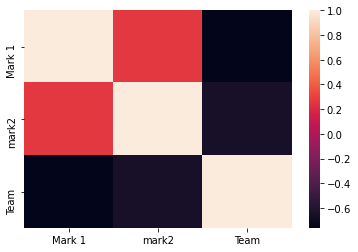

In [16]:
sns.heatmap(a)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mark2', ylabel='Density'>

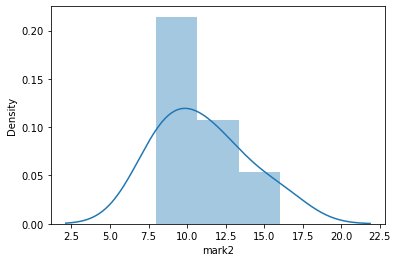

In [17]:
sns.distplot(df['mark2'])

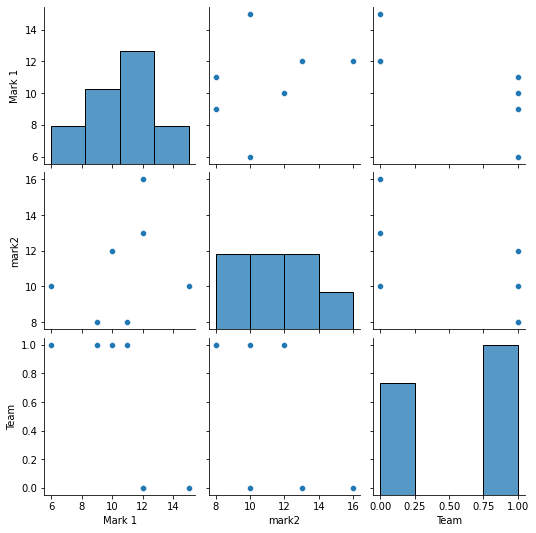

In [18]:
sns.pairplot(df)

In [19]:
df.columns

Index(['Mark 1', 'mark2', 'Team'], dtype='object')

In [20]:
x=df[['Mark 1', 'mark2']]
y=df['Team']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)

In [22]:
x_train.index

Int64Index([4, 0, 1, 2], dtype='int64')

In [23]:
x_test.index

Int64Index([3, 5, 6], dtype='int64')

In [24]:
l=SVC()

In [25]:
l.fit(x_train,y_train)

SVC()

In [26]:
p=l.predict(x_test)
p

array([1, 1, 0], dtype=int64)

In [27]:
df1=pd.DataFrame({"Predicted":p,"Actual":y_test})
df1

,Predicted,Actual
3,1,1
5,1,1
6,0,0


In [28]:
x_train.head(1)

,Mark 1,mark2
4,11,8


In [29]:
l.predict([[12,34]])

array([0], dtype=int64)

In [30]:
confusion_matrix(y_test,p)

array([[1, 0],
       [0, 2]], dtype=int64)

In [31]:
print("recall score is",recall_score(y_test,p))

recall score is 1.0


In [32]:
print("accuracy score is",accuracy_score(y_test,p))

accuracy score is 1.0


In [33]:
print("precision score is",precision_score(y_test,p))

precision score is 1.0


In [34]:
print("f1 score is",f1_score(y_test,p))

f1 score is 1.0


In [35]:
tp,fn,fp,tn=confusion_matrix(y_test,p).reshape(-1)

In [36]:
tp

1

In [37]:
fn

0

In [38]:
fp

0

In [39]:
tn

2